In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as pl
from scipy.spatial.distance import cdist

In [2]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

axis_X = 0
axis_Y = 1
X = np.concatenate((X0,X1,X2), axis=axis_X)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

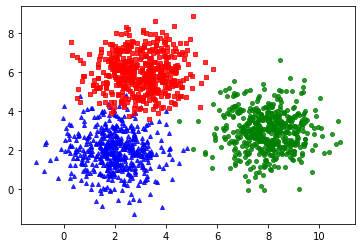

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    x = X0[:,0]
    y = X0[:,1]
    pl.plot(x, y, 'b^', markersize=4, alpha=.8)
    
    x = X1[:,0]
    y = X1[:,1]
    pl.plot(x, y, 'go', markersize=4, alpha=.8)
    
    x = X2[:,0]
    y = X2[:,1]
    pl.plot(x, y, 'rs', markersize=4, alpha=.8)
    
kmeans_display(X, original_label)

In [4]:
# randomly pick k rows of X as initial centers
def kmeans_init_centers(X,k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# calculate pairwise distances between data and centers
def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    
    # return index of the closest center
    return np.argmin(D, axis=axis_Y)

# update new centers which are based on new labeled data
def kmeans_update_centers(X, labels, K):
    arr_like = (K, X.shape[1])
    centers = np.zeros(arr_like)
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels==k,:]
        
        # take average
        centers[k,:] = np.mean(Xk, axis=axis_X)
    return centers

# check the stop condition of the k-means algorithm
# converge = hoi. tu.
def has_converged(centers, new_centers):
    # return True if 2 sets of centers are the same
    set_centers = set([tuple(a) for a in centers])
    set_centers_new = set([tuple(a) for a in new_centers])
    
    return set_centers == set_centers_new

In [5]:
# main part of the K-means clustering
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        label = kmeans_assign_labels(X, centers[-1])
        labels.append(label)
        
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [6]:
(centers, labels, it) = kmeans(X, K)

print('Centers found by the K-means algorithm:')
print(centers[-1])

Centers found by the K-means algorithm:
[[8.64692585 3.20400305]
 [7.14805241 2.69567718]
 [2.4711585  3.97642603]]


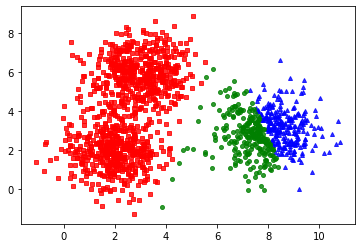

In [7]:
kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[7.95757323 2.96286722]
 [1.98620488 1.92460168]
 [2.97856071 5.96602839]]


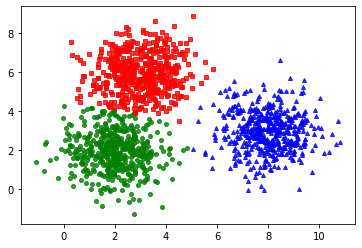

In [9]:
# So sanh ket qua voi lib scikit-learn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)